## Parameters

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from utilities import *
from matplotlib.dates import DateFormatter
%matplotlib inline

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)
GUARDIAN_DIR = os.path.join(ROOT_DIR, "data", "Guardian.csv")
REUTERS_DIR = os.path.join(ROOT_DIR, "data", "Reuters.csv")


In [20]:
# matplotlib globals
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 13
mpl.rcParams["xtick.labelsize"] = 13
mpl.rcParams["ytick.labelsize"] = 13
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = "medium"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

# mpl.rcParams.keys()

In [21]:
centininch = 2.54
inchincent = 0.3937


def centtoinch(cents):
    return 0.3937 * cents


def inchtocent(inches):
    return 2.54 * inches

## Data

In [22]:
reuters_data = pd.read_csv(PARENT_DIR + "/results/Reuters_results.csv", parse_dates=['Date'], index_col= ['Date'])
guardian_data = pd.read_csv(PARENT_DIR + "/results/Guardian_results.csv", parse_dates=['Date'], index_col= ['Date'])

reuters_davg = reuters_data.drop(columns=['Title','Text','URL','Topic']).resample('D').mean()
guardian_davg = guardian_data.drop(columns=['Title','Text','URL','Topic']).resample('D').mean()

reuters_ntr = pd.read_table(PARENT_DIR + "/results/ReutersNovelTransReson.txt", sep=" ", header=None, names=["Novelty", "Transience", "Resonance"])
guardian_ntr = pd.read_table(PARENT_DIR + "/results/GuardianNovelTransReson.txt", sep=" ", header=None, names=["Novelty", "Transience", "Resonance"])

## Scatter plots

In [23]:
def scatter_plot(data,title,xlabel,ylabel):

       fig, ax = plt.subplots(figsize=(25, 3))

       beginning = dt.date(2021, 7, 21)
       end = dt.date.today()

       ax.plot(data.index.values,
              data['Resonance'],
              color='purple',
              #linewidths=0
              )

       ax.set(
              #xlabel=xlabel,
              #ylabel=ylabel,
              title=title
              )

       date_form = DateFormatter("%m-%y")
       ax.xaxis.set_major_formatter(date_form)
       ax.set_xbound(beginning, end)

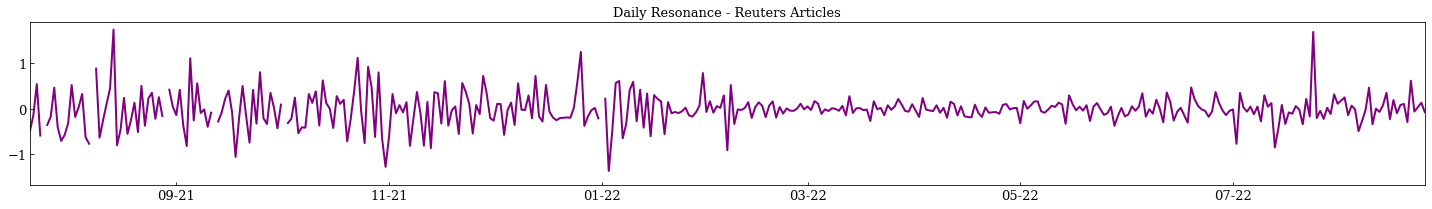

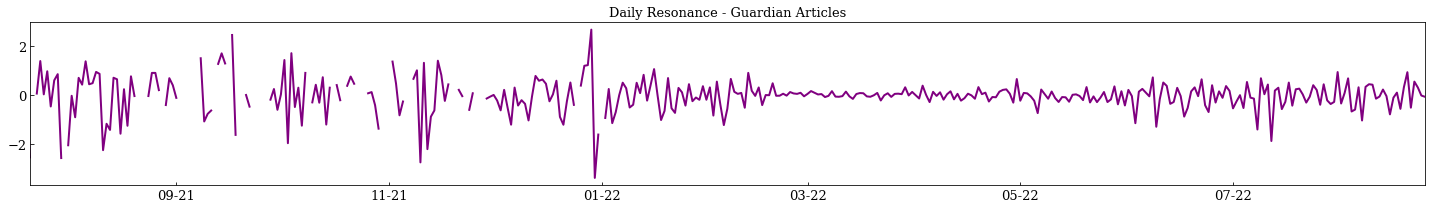

In [24]:
scatter_plot(reuters_davg,"Daily Resonance - Reuters Articles","","")
scatter_plot(guardian_davg,"Daily Resonance - Guardian Articles","","")

## Density plots

In [27]:
def plot_quants_2Dhist(quants, DATA_NTR, ax, xbins, ybins, make_cbar=False, cbar_axis=False, cbar_orientation="vertical", colorvmax=None):

    q0 = DATA_NTR[quants[0]] #["Novelty", "Resonance"][0]
    q1 = DATA_NTR[quants[1]]

    q0bins = xbins
    q1bins = ybins

    H, xedges, yedges = np.histogram2d(q0.to_numpy(), q1.to_numpy(), bins=[q0bins, q1bins])

    # H needs to be rotated and flipped
    H = np.rot90(H)
    H = np.flipud(H)

    # Mask zeros
    Hmasked = np.ma.masked_where(H == 0, H)  # Mask pixels with a value

    # Plot 2D histogram using pcolor
    if colorvmax:
        usemax = colorvmax
    else:
        usemax = H.max()
    pcolm = ax.pcolormesh(xedges, yedges, Hmasked, norm=mpl.colors.LogNorm(vmin=1, vmax=usemax))

    if make_cbar:
        if cbar_axis:
            cbar = fig.colorbar(pcolm, cax=cbar_axis, orientation=cbar_orientation)
        else:
            cbar = fig.colorbar(pcolm, ax=ax, orientation=cbar_orientation)
        cbar.ax.set_ylabel("counts")

    ax.set_xlabel(quants[0])
    ax.set_ylabel(quants[1])

    if make_cbar:
        return H, cbar
    else:
        return H

def hist2dplot(data,source):

    # Plot densities:
    #
    # 1) transience v. novelty,
    # 2) resonance v. novelty

    figsize = (4.5,2.5)

    fig = plt.figure(figsize=figsize)

    ## Plot Transience v. Novelty

    # Formato Eixos
    ax = fig.add_axes([0.1, 0.19, 0.4, 0.72])

    # Formato Cbar
    cbaxes = fig.add_axes([0.4, 0.29, 0.02, 0.2])

    # Colunas
    quants = ["Novelty", "Transience"]

    # Quadrados (bins)
    xbins = np.linspace(0, 10, 30)
    ybins = np.linspace(0, 10, 30)

    ## Gerando gráfico
    H, cbar = plot_quants_2Dhist(quants, data, ax, xbins, ybins, make_cbar=True, cbar_axis=cbaxes, cbar_orientation="vertical")

    # Titulo
    ax.set_title("Transience v. Novelty")

    # Colorbar
    cbar.ax.set_ylabel("") # Sem label no Y
    cbar.ax.set_xlabel("") # Sem label no X
    cbar.ax.yaxis.set_ticks_position("left") # Posicaoo ticks
    cbar.ax.tick_params(labelsize=7)

    # Linha X=Y
    ax.plot([0, 8.9], [0, 8.9], "k--", linewidth=1.5)

    # Legenda
    #ax.legend([mpl.lines.Line2D([0], [0], color="k", linewidth=1.5, linestyle="--")], ["x=y"], loc="upper center", fontsize=8, ncol=2, handlelength=2.7)

    # Eixo X
    ax.set_xlabel("Novelty $\mathcal{N}$")
    ax.set_xlim(0, 11.5) # Escala do eixo X
    ax.set_xticks([0, 2, 4, 6, 8, 10]) # Numeros de interesse eixo
    ax.xaxis.set_ticks_position("bottom") # Ticks embaixo
    ax.spines["bottom"].set_bounds(0, 10) # Delimita eixo
    ax.spines["top"].set_visible(False)  # Oculta eixo superior

    # Eixo Y
    ax.set_ylabel("Transience $\mathcal{T}$         ")
    ax.set_ylim(0, 11.5) # Escala do eixo Y
    ax.set_yticks([0, 2, 4, 6, 8]) # Numeros de interesse eixo
    ax.yaxis.set_ticks_position("left") # Ticks na esquerda
    ax.spines["left"].set_bounds(0, 8) # Delimita eixo
    ax.spines["right"].set_visible(False) # Oculta eixo direito

    ## Plot Resonance v. Novelty

    # Formato Eixos
    ax = fig.add_axes([0.6, 0.19, 0.35, 0.65]) # Dist do Y, Dist do X, largura, altura do grafico

    # Formato Cbar
    cbaxes = fig.add_axes([0.9, 0.29, 0.02, 0.2]) # Dist do Y, Dist do X, largura, altura da cbar

    # Colunas
    quants = ["Novelty", "Resonance"]

    # Quadrados (bins)
    xbins = np.linspace(0, 11, 30) # Range dos quadrados em X, larguras
    ybins = np.linspace(-7, 8, 30) # Range dos quadrados em Y, alturas

    ## Gerando gráfico
    H, cbar = plot_quants_2Dhist(quants, data, ax, xbins, ybins, make_cbar=True, cbar_axis=cbaxes, cbar_orientation="vertical")

    # Titulo
    ax.set_title("Resonance v. Novelty")

    # Linha pontilhada
    ax.axhline(color="k", linewidth=1.5, linestyle=":")

    # Colorbar
    cbar.ax.set_ylabel("") # Sem label no Y
    cbar.ax.set_xlabel("") # Sem label no X
    cbar.ax.yaxis.set_ticks_position("right") # Posicaoo ticks
    cbar.ax.tick_params(labelsize=7) # Tamanho numeros ticks

    # Eixo X
    ax.set_xlabel("Novelty $\mathcal{N}$")
    ax.set_xlim(-1, 10) # Escala do eixo X
    ax.set_xticks([0, 2, 4, 6, 8, 10]) # Numeros de interesse eixo
    ax.xaxis.set_ticks_position("bottom") # Ticks embaixo
    ax.spines["bottom"].set_bounds(0, 10) # Delimita eixo
    ax.spines["top"].set_visible(False) # Oculta eixo superior

    # Eixo Y
    ax.set_ylabel("Resonance $\mathcal{R}}$")
    ax.set_ylim(-7, 8) # Escala do eixo Y
    ax.set_yticks([-5, 0, 5]) # Numeros de interesse eixo
    ax.yaxis.set_ticks_position("left") # Ticks na esquerda
    ax.spines["left"].set_bounds(-5, 5) # Delimita eixo
    ax.spines["right"].set_visible(False) # Oculta eixo direito

    fig.savefig(PARENT_DIR + "/figures/" + source + "_TvN.svg", format="svg")
        

NameError: name 'fig' is not defined

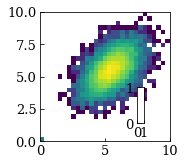

In [28]:
hist2dplot(reuters_ntr,"Reuters")
hist2dplot(guardian_ntr,"Guardian")

In [ ]:
# matplotlib globals
mpl.rcParams["axes.labelsize"] = 12
mpl.rcParams["axes.titlesize"] = 13
mpl.rcParams["xtick.labelsize"] = 13
mpl.rcParams["ytick.labelsize"] = 13
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.linewidth"] = 1
mpl.rcParams["legend.fontsize"] = "medium"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

# mpl.rcParams.keys()